# Analisis de datos sobre IRIS

![]()

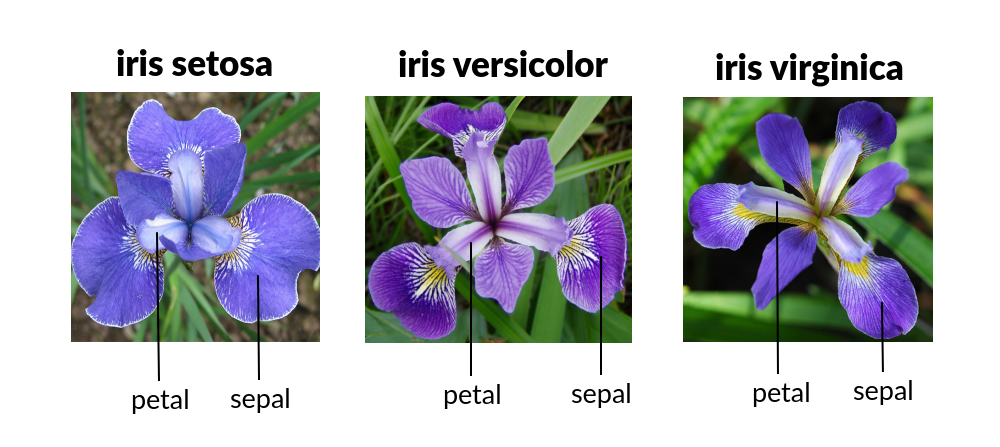

Estos conjuntos de datos consisten en 3 tipos diferentes de iris (Setosa, Versicolor y Virginica) con longitud de pétalos y sépalos.

El conjunto de datos de la flor del Iris o conjunto de datos del Iris de Fisher es un conjunto de datos multivariante utilizado y hecho famoso por el estadístico y biólogo británico Ronald Fisher en su artículo de 1936.

El uso de mediciones múltiples en problemas taxonómicos como ejempli de análisis discriminante lineal.

|Nombre Variable|Rol|Tipo|Descripción|Unidades|Missing|
|---|---|---|---|---|---|
|sepal length|Feature|Continua|longitud del sépalo|cm|no|
|sepal width|Feature|Continua|anchura del sépalo|cm|no|
|petal length|Feature|Continua|longitud del pétalo|cm|no|
|petal width|Feature|Continua|anchura del pétalo|cm|no|
|class|Target|Categorica|clase de iris: Setosa, Versicolor y Virginica|0,1,2|no|

# Preparación y Carga de datos

## Librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_iris

# Carga de datos

In [3]:
data = load_iris()
data
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
data['data']
data['target']
data['frame']
data['target_names']
data['DESCR']
data['feature_names']
data['filename']
data['data_module']
# aquí identificas lo que necesitas de datos para seguir adelante y hacer las analisis

'sklearn.datasets.data'

In [5]:
variables = pd.DataFrame(data['data'],columns=data['feature_names'])
variables.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [6]:
variables['clase'] = data['target']
variables

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clase
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
# dict(zip(range(len(data['target_names'])),data['target_names'])) #ejemplo mas simple a ser utilizado cuando tienes muchos dados

In [8]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
variables['clase'].replace({0:'setosa',1:'versicolor',2:'virginica'}, inplace=True)

C:\Users\Felipe\AppData\Local\Temp\ipykernel_20436\982432562.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  variables['clase'].replace({0:'setosa',1:'versicolor',2:'virginica'}, inplace=True)


In [10]:
variables.to_parquet('iris.parquet', index=False) #Guardar dataframe

In [11]:
df = pd.read_parquet('iris.parquet')
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clase
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Verificación inicial

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   clase              150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
clase                0
dtype: int64

In [14]:
df[df.duplicated()]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clase
142,5.8,2.7,5.1,1.9,virginica


asumo que el valor duplicado observado posiblemente sea por la escala

### Observaciones
1. No hay nulos
2. Aunque hay duplicados podemos asumir que es por la escala o la proporción
3. Los tipos de datos están correctos

## Limpieza y Preprocesado

#### Preprocesado

**Feature Engineer**

In [15]:
df['area sepal (cm)'] = df['sepal length (cm)'] * df['sepal width (cm)']
df['area petal (cm)'] = df['petal length (cm)'] * df['petal width (cm)']

In [16]:
# clase = df.pop('clase')

In [17]:
# df = pd.concat([df, clase], axis='columns')
# df

In [18]:
df = df[['sepal length (cm)','sepal width (cm)','area sepal (cm)','petal length (cm)','petal width (cm)','area petal (cm)','clase']]
df


,sepal length (cm),sepal width (cm),area sepal (cm),petal length (cm),petal width (cm),area petal (cm),clase
0,5.1,3.5,17.85,1.4,0.2,0.28,setosa
1,4.9,3.0,14.70,1.4,0.2,0.28,setosa
2,4.7,3.2,15.04,1.3,0.2,0.26,setosa
3,4.6,3.1,14.26,1.5,0.2,0.30,setosa
4,5.0,3.6,18.00,1.4,0.2,0.28,setosa
...,...,...,...,...,...,...,...
145,6.7,3.0,20.10,5.2,2.3,11.96,virginica
146,6.3,2.5,15.75,5.0,1.9,9.50,virginica
147,6.5,3.0,19.50,5.2,2.0,10.40,virginica
148,6.2,3.4,21.08,5.4,2.3,12.42,virginica


## Obervaciones

1. Se crearon dos variables nuevas que representan el area de cada parte de la flor

## Análisis Descriptivo

In [19]:
df.describe()

,sepal length (cm),sepal width (cm),area sepal (cm),petal length (cm),petal width (cm),area petal (cm)
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,17.822867,3.758000,1.199333,5.794067
std,0.828066,0.435866,3.361854,1.765298,0.762238,4.712390
min,4.300000,2.000000,10.000000,1.000000,0.100000,0.110000
25%,5.100000,2.800000,15.660000,1.600000,0.300000,0.420000
50%,5.800000,3.000000,17.660000,4.350000,1.300000,5.615000
75%,6.400000,3.300000,20.325000,5.100000,1.800000,9.690000
max,7.900000,4.400000,30.020000,6.900000,2.500000,15.870000


In [20]:
df['clase'].value_counts(normalize=True)

clase
setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: proportion, dtype: float64

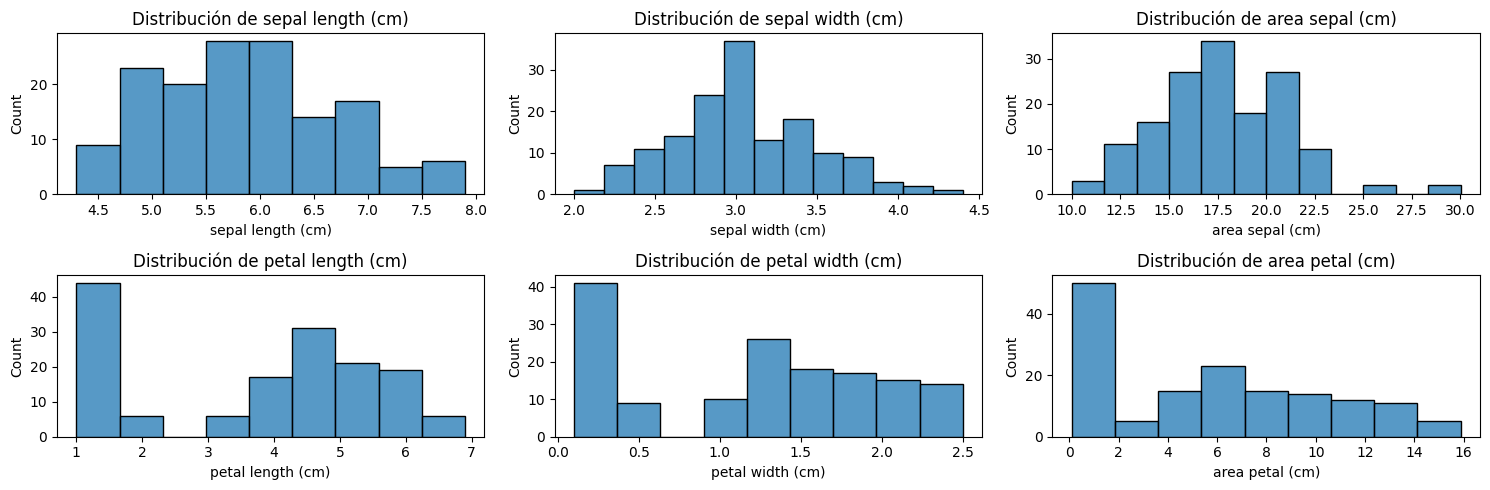

In [21]:
plt.figure(figsize=(15,5))
for i, feature in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(2, 3 , i+1)
    sns.histplot(data = df, x = feature)
    plt.title(f'Distribución de {feature}')

plt.tight_layout()
plt.show()

# Hallazgos Descriptivos

* Dataset perfectamente balanceado (50 muestras por especie)
* Las medidas de los pétalos tienen mayor variabilidad que las de los sépalos
* Los rangos de medidas son:
    * Sépalo: 4.3 - 7.9 cm (largo), 2.0 - 4.4 cm (ancho), 10.0 -30.0 cm2 (area)
    * Pétalo: 1.0 - 6.9 cm (largo), 0.1 - 2.5 cm (ancho), 0.1 -15.9 cm2 (area)

# Análisis Exploratorio

In [22]:
df

,sepal length (cm),sepal width (cm),area sepal (cm),petal length (cm),petal width (cm),area petal (cm),clase
0,5.1,3.5,17.85,1.4,0.2,0.28,setosa
1,4.9,3.0,14.70,1.4,0.2,0.28,setosa
2,4.7,3.2,15.04,1.3,0.2,0.26,setosa
3,4.6,3.1,14.26,1.5,0.2,0.30,setosa
4,5.0,3.6,18.00,1.4,0.2,0.28,setosa
...,...,...,...,...,...,...,...
145,6.7,3.0,20.10,5.2,2.3,11.96,virginica
146,6.3,2.5,15.75,5.0,1.9,9.50,virginica
147,6.5,3.0,19.50,5.2,2.0,10.40,virginica
148,6.2,3.4,21.08,5.4,2.3,12.42,virginica


<Figure size 1500x500 with 0 Axes>

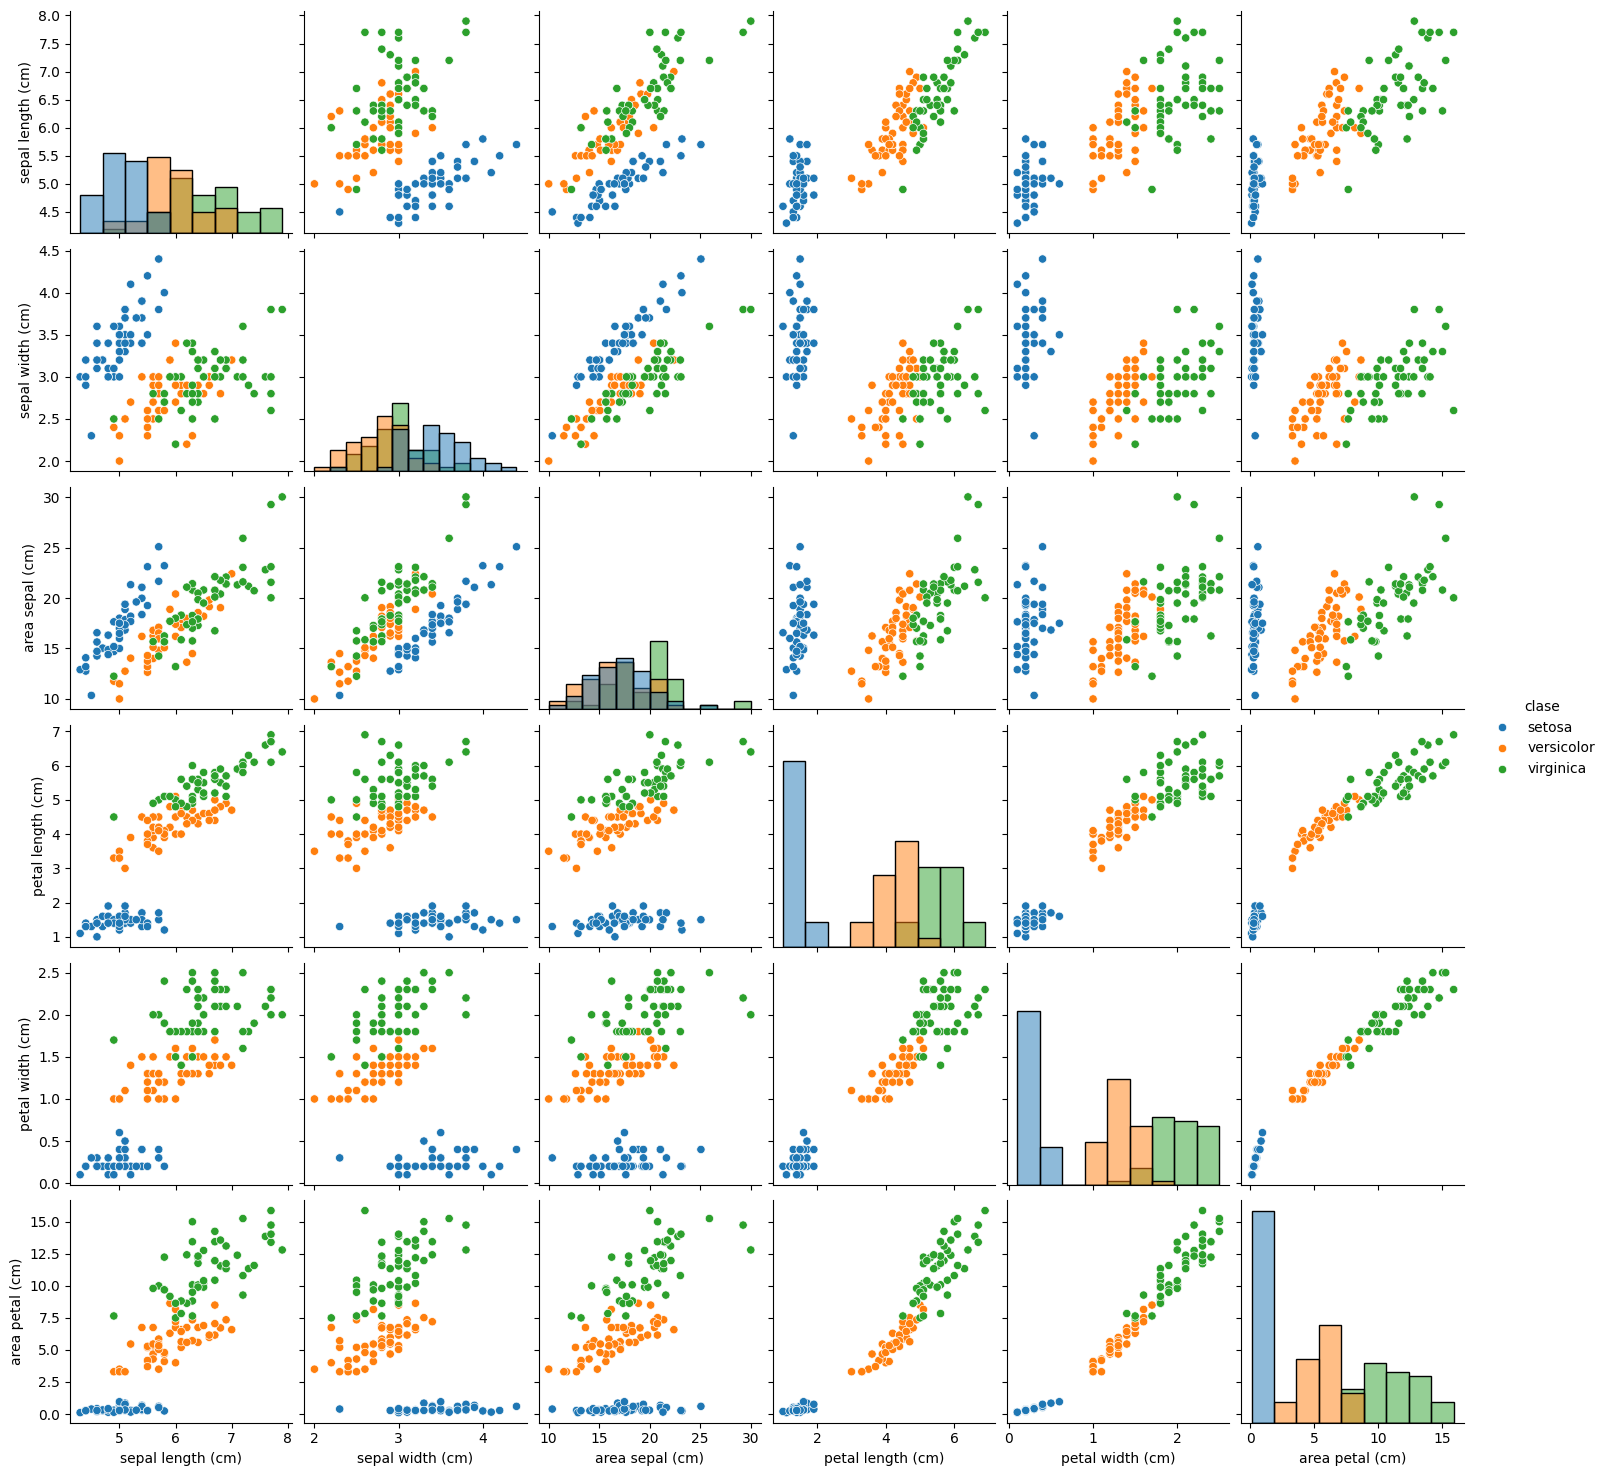

In [25]:
plt.figure(figsize=(15,5))
sns.pairplot(df, hue='clase',diag_kind='hist')
plt.show()

In [50]:
FEATURES = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
TARGET = ['clase']

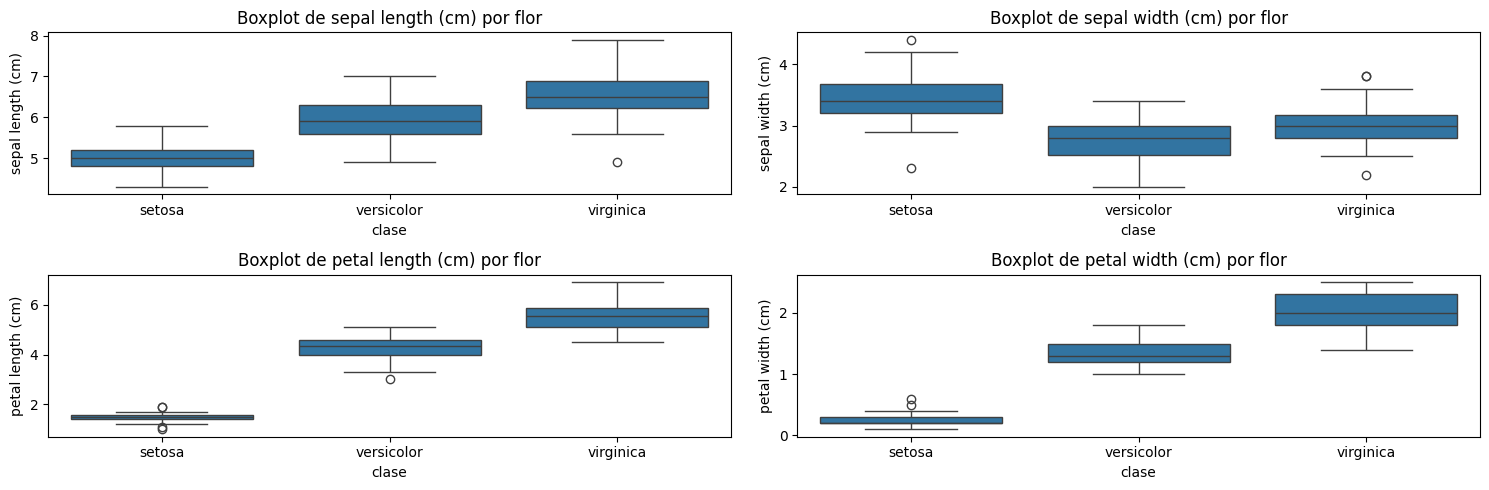

In [52]:
plt.figure(figsize=(15,5))
for i, col in enumerate(df[FEATURES].columns):
# for i, col in enumerate(df.drop(columns='clase').columns): incluindo las areas para constatar que no ayudan en nada mas para diferenciar las folres una de la otra
    plt.subplot(2,2 , i+1)
    sns.boxplot(data=df, x='clase', y = col)
    plt.title(f'Boxplot de {col} por flor')
plt.tight_layout()
plt.show()

In [55]:
df.drop(columns='clase').corr() #matriz de correlacion, define la relacion entre la coluna 1 y la 2

,sepal length (cm),sepal width (cm),area sepal (cm),petal length (cm),petal width (cm),area petal (cm)
sepal length (cm),1.000000,-0.117570,0.679180,0.871754,0.817941,0.857300
sepal width (cm),-0.117570,1.000000,0.643461,-0.428440,-0.366126,-0.288431
area sepal (cm),0.679180,0.643461,1.000000,0.360909,0.368845,0.454503
petal length (cm),0.871754,-0.428440,0.360909,1.000000,0.962865,0.958422
petal width (cm),0.817941,-0.366126,0.368845,0.962865,1.000000,0.980333
area petal (cm),0.857300,-0.288431,0.454503,0.958422,0.980333,1.000000


<Axes: >

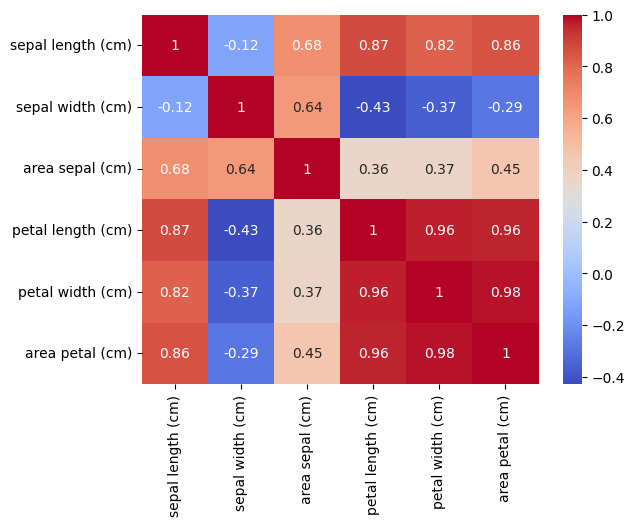

In [56]:
sns.heatmap(df.drop(columns='clase').corr(),annot=True, cmap='coolwarm')

### Hallazgos

- Existe clara separación entre setosa y las otras dos clases
- Versicolor y Virginica cierto solapamiento
- Fuerte correlación entre largo y ancho de pétalo
- La flor setosa tiene pétalos notablemente mas pequeños

# Análisis Diagnóstico

Text(0.5, 1.0, 'Relación pétalo')

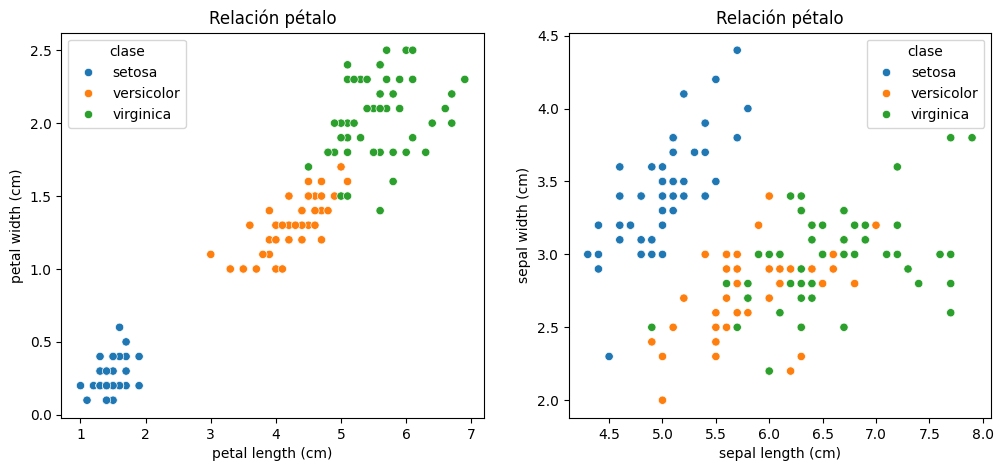

In [57]:
plt.figure(figsize=(12,5))

# Relación de pétalo

plt.subplot(1,2,1)
sns.scatterplot(data=df, x=FEATURES[2], y=FEATURES[3], hue='clase')
plt.title('Relación pétalo')

# Relación de sépalo

plt.subplot(1,2,2)
sns.scatterplot(data=df, x=FEATURES[0], y=FEATURES[1], hue='clase')
plt.title('Relación pétalo')

C:\Users\Felipe\AppData\Local\Temp\ipykernel_20436\861103064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['petal_ratio'] = df['petal length (cm)'] / df['petal width (cm)']
C:\Users\Felipe\AppData\Local\Temp\ipykernel_20436\861103064.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sepal_ratio'] = df['sepal length (cm)'] / df['sepal width (cm)']


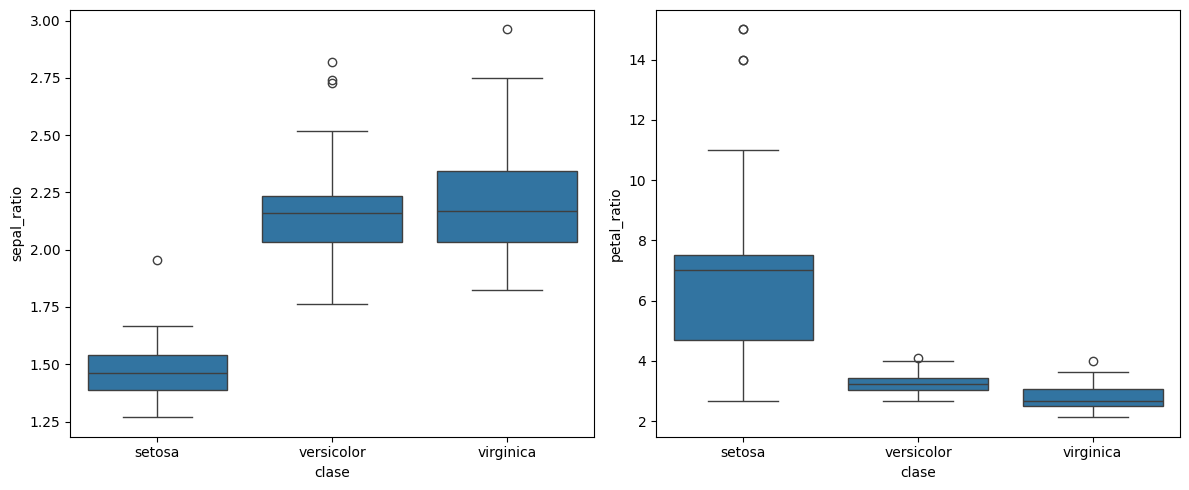

In [69]:
# Análisis de ratios
df['petal_ratio'] = df['petal length (cm)'] / df['petal width (cm)']
df['sepal_ratio'] = df['sepal length (cm)'] / df['sepal width (cm)']

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, x='clase', y='sepal_ratio')

# plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
sns.boxplot(data=df, x='clase', y='petal_ratio')
plt.tight_layout()
plt.show();

# Hallazgos

- Las medidas del petalo son más utiles para distinguir especies
- Setosa es completamente separable usando medidas del pétalo
- Los ratios proporcionan información adicional para la clasificación
- La variabilidad de medidas es menor en setosa